In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Step 1: Read the Fashion MNIST dataset
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)

c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


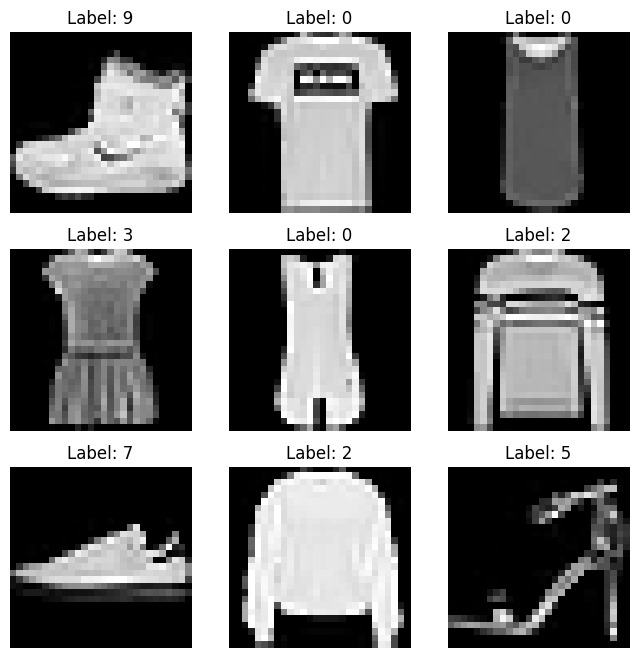

In [3]:
# Step 2: Preprocess the data
# Display a sample of the data
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y[i]}')
plt.show()

In [4]:
# Step 3: Normalize the data and convert the matrix
X = X / 255.0  # Normalize the pixel values (0-255) to range 0-1
X = X.reshape((-1, 28*28))  # Reshape the matrix to (1, 784)

In [5]:
# Step 4: Separate training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [7]:
y_train_predm = model.predict(X_train)
y_test_predm = model.predict(X_test)
test_accuracym = accuracy_score(y_test, y_test_predm)
train_accuracym = accuracy_score(y_train, y_train_predm)
print(f'Training accuracy with model: {train_accuracym:.4f}')
print(f'Testing accuracy with model: {test_accuracym:.4f}')

Training accuracy with model: 0.8797
Testing accuracy with model: 0.8518


In [8]:
# Step 6: Cross-validation and average error
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
avg_error = 1 - np.mean(cross_val_scores)
print(f'Average cross-validation error: {avg_error:.4f}')

c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Average cross-validation error: 0.1498


c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Step 7: Hyperparameter tuning
C_values = [0.1, 1.0, 10.0]
best_accuracy = 0.0
best_C = None
for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_train, y_train)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [10]:
# Step 8: Calculate accuracy and correctness with the best model
best_model = LogisticRegression(C=best_C, max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Print results
print(f"Average error (cross-validation): {avg_error}")
print(f"Best hyperparameters: C={best_C}")
print(f"Accuracy for best model (training data): {train_accuracy}")
print(f"Accuracy for best model (test data): {test_accuracy}")

Average error (cross-validation): 0.14980357142857126
Best hyperparameters: C=10.0
Accuracy for best model (training data): 0.8827142857142857
Accuracy for best model (test data): 0.8469285714285715


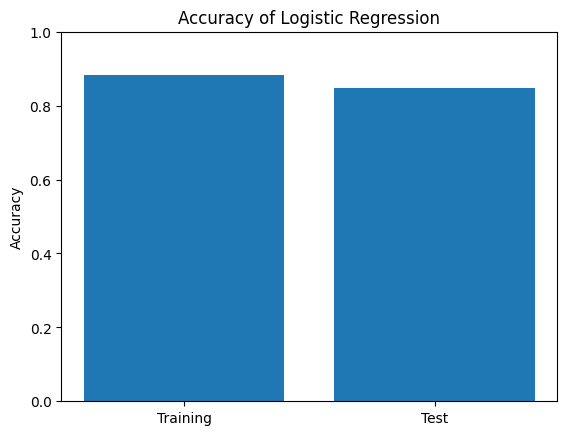

In [12]:
# Step 9: Plot accuracy values for training and test data
x_values = ['Training', 'Test']
y_values = [train_accuracy, test_accuracy]
plt.bar(x_values, y_values)
plt.ylim([0, 1])
plt.title('Accuracy of Logistic Regression')
plt.ylabel('Accuracy')
plt.show()